### Based on Lanaro: Python High Performance

# Concurrency

As a first example, we will describe how to **implement concurrent access to a slow network
resource**. 

Let's say we have a web service that takes the square of a number, and the time
between our request and the response will be approximately one second.  

We can implement the **network_request function** that **takes a number and returns a dictionary**
that contains information about the success of the operation and the result. We can simulate
such services using the time.sleep function, as follows:

In [1]:
import time

def network_request(number):
    print("*** I will wait one second ***")
    time.sleep(1.0) # Wait and Block the CPU
    print("*** Waiting done ***")
    # return a dictionary
    return {"success": True, "result": number ** 2}

We will also write some additional code that performs the request, verifies that the request was successful, 
and prints the result. 

In the following code, we define the fetch_square function and use it to calculate the square of the number 
two using a call to network_request:

In [2]:
def fetch_square(number):
        response = network_request(number)
        if response["success"]:
            print("Result is: {}".format(response["result"]))

In [3]:
fetch_square(2)

*** I will wait one second ***
*** Waiting done ***
Result is: 4


Fetching a number from the network will take one second because of the slow network.
What if we want to calculate the square of multiple numbers? We can call fetch_square,
which will start a network request as soon as the previous one is done:

In [4]:
fetch_square(2)
fetch_square(3)
fetch_square(4)
fetch_square(5)
fetch_square(12)


*** I will wait one second ***
*** Waiting done ***
Result is: 4
*** I will wait one second ***
*** Waiting done ***
Result is: 9
*** I will wait one second ***
*** Waiting done ***
Result is: 16
*** I will wait one second ***
*** Waiting done ***
Result is: 25
*** I will wait one second ***
*** Waiting done ***
Result is: 144


The previous code will take three seconds to run, but it's not the best we can do. Waiting for
the previous result to finish is unnecessary as we can technically submit multiple requests
at and wait for them parallely.

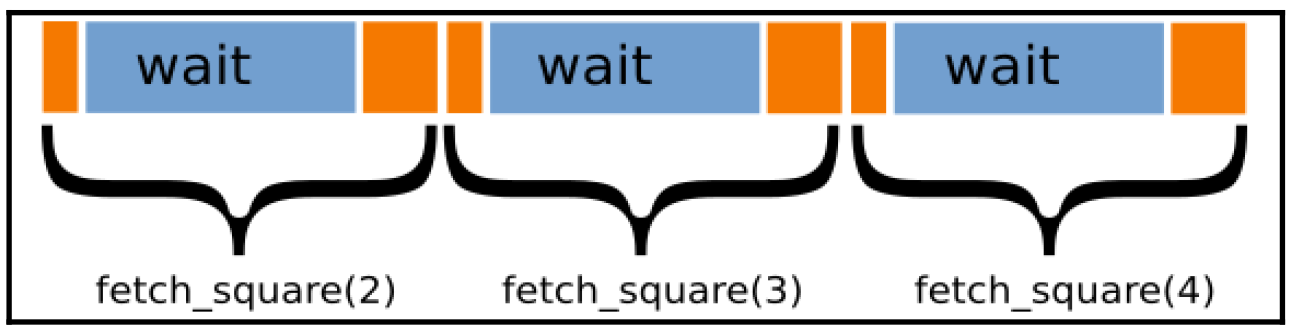

Ideally, we would like to start other new task while we are waiting for the already
submitted tasks to finish. 

In the following figure, you can see that as soon as we submit our request in fetch_square(2), we can start preparing for fetch_square(3) and so on. This
allows us to reduce the CPU waiting time and to start processing the results as soon as they
become available

We still use only one core one thread!

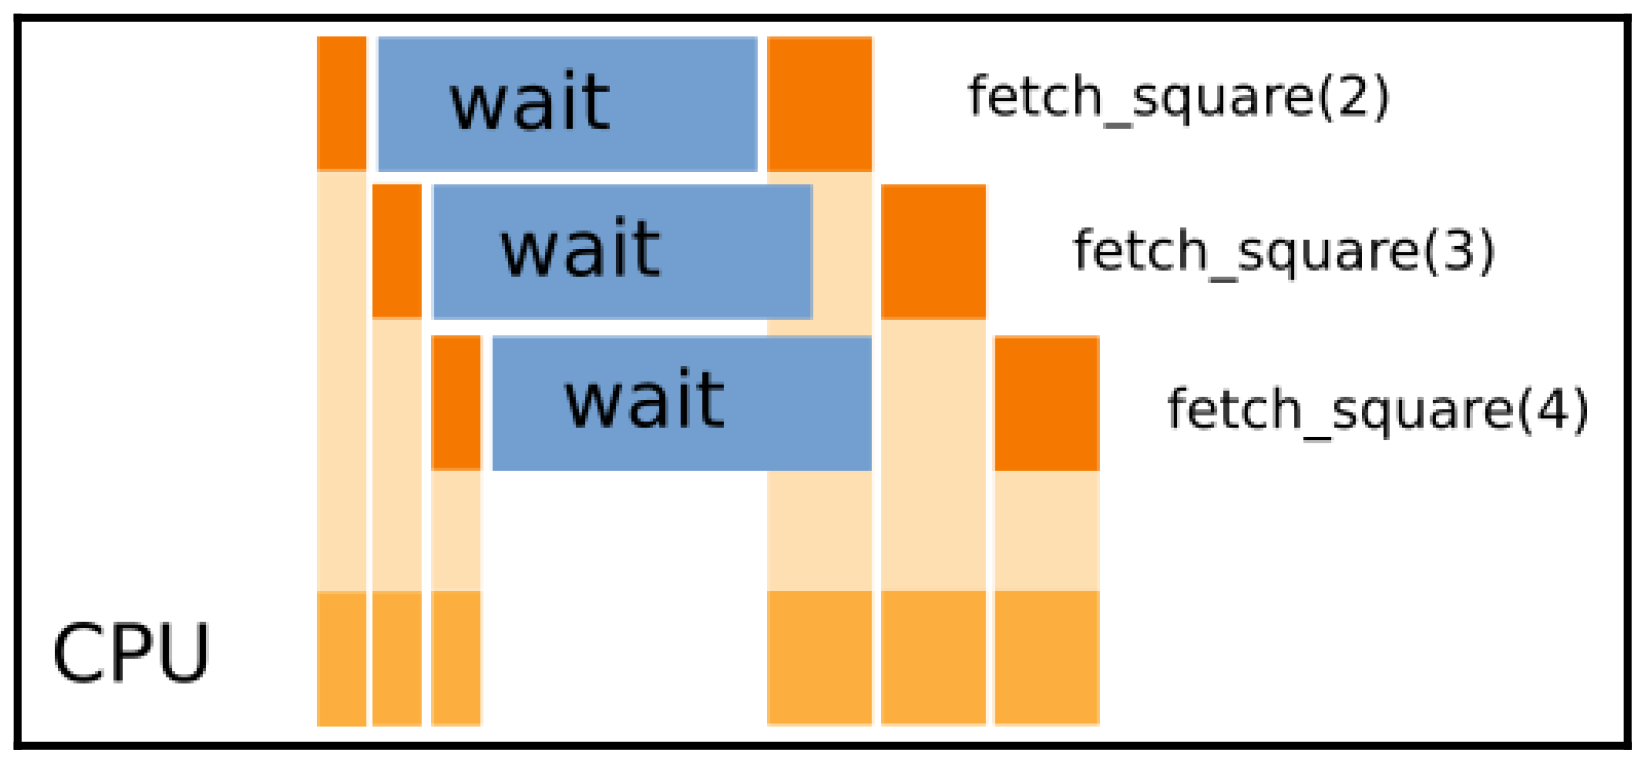

This strategy is made possible by the fact that the three requests are completely
independent, and **we don't need to wait for the completion of a previous task to start the
next one**. Also, note how a **single CPU can comfortably handle** this scenario. (We **don't need multiple CPUs, Threads yet**)